In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Load NeuralNetwork class

import importlib
import NeuralNetwork

importlib.reload(NeuralNetwork)

from NeuralNetwork import Linear, Sigmoid, ReLU, BinaryCrossEntropyLoss, Sequential, save_weights, load_weights

Epoch 0, Loss: 0.7320384042833963
Epoch 100, Loss: 0.6903371655340802
Epoch 200, Loss: 0.6885749783745361
Epoch 300, Loss: 0.6865640273817042
Epoch 400, Loss: 0.6842613874214682
Epoch 500, Loss: 0.6816345581961053
Epoch 600, Loss: 0.678647386998046
Epoch 700, Loss: 0.6752576968321071
Epoch 800, Loss: 0.6714175450284812
Epoch 900, Loss: 0.6670760033498849
Sigmoid Outputs:
[[0]
 [1]
 [1]
 [1]]
Weights saved to sigmoid_xor.w


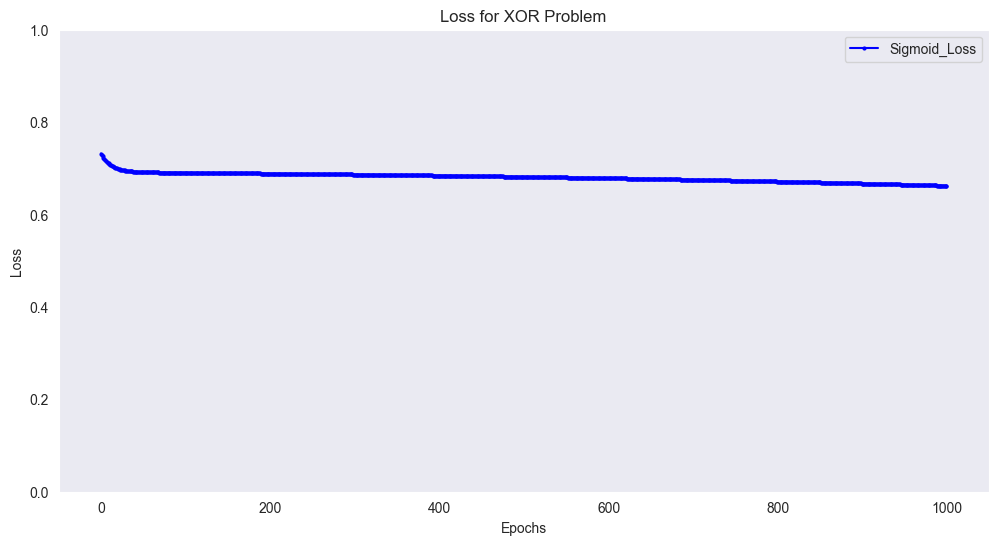

In [14]:
# XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create the neural network model
model_sigmoid = Sequential()
model_sigmoid.add(Linear(2, 2))
model_sigmoid.add(Sigmoid())
model_sigmoid.add(Linear(2, 1))
model_sigmoid.add(Sigmoid())

epochs = 1000
learning_rate = 0.01
sigmoid_losses = []

for epoch in range(epochs):
    predicted = model_sigmoid.forward(X)

    loss_layer = BinaryCrossEntropyLoss()
    loss = loss_layer.forward_with_labels(predicted, y)
    sigmoid_losses.append(loss)

    loss_grad = loss_layer.backward_with_labels(predicted, y)
    model_sigmoid.backward(loss_grad)

    model_sigmoid.update(learning_rate)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

predicted = model_sigmoid.forward(X)
predicted_classes = (predicted > 0.5).astype(int)

print("Sigmoid Outputs:")
print(predicted_classes)
save_weights(model_sigmoid,'sigmoid_xor.w')

plt.figure(figsize=(12, 6))
plt.plot(sigmoid_losses, label='Sigmoid_Loss',color='blue',marker='o',markersize=2)
plt.title('Loss for XOR Problem')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

In [15]:
# Loading dataset from nyc_taxi_data.npy
dataset = np.load("nyc_taxi_data.npy", allow_pickle=True).item()
X_train, y_train, X_test, y_test = dataset["X_train"], dataset["y_train"], dataset["X_test"], dataset["y_test"]
X_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
879655,id2425795,1,2016-01-08 23:55:11,2016-01-09 00:04:32,1,-73.955551,40.773346,-73.973640,40.763500,N
646838,id0767831,2,2016-03-05 09:52:06,2016-03-05 10:00:12,1,-73.962181,40.763599,-73.980377,40.764919,N
1138713,id0449104,1,2016-04-09 16:03:53,2016-04-09 16:21:22,1,-73.977486,40.751842,-74.011688,40.718925,N
864716,id3030157,1,2016-01-06 11:12:44,2016-01-06 11:19:49,1,-73.970001,40.762363,-73.963264,40.774666,N
434927,id1584885,1,2016-06-26 09:10:56,2016-06-26 09:17:44,1,-73.950348,40.771561,-73.968178,40.762409,N


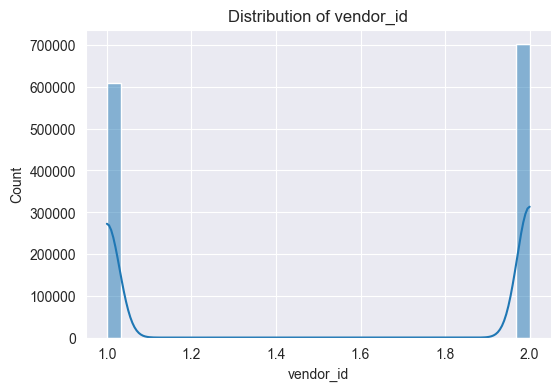

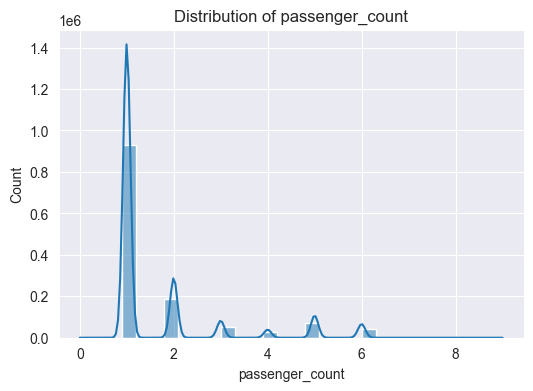

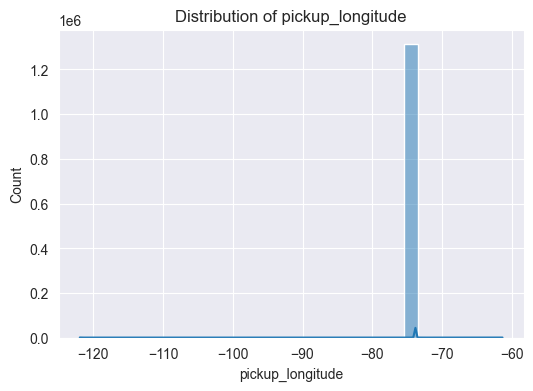

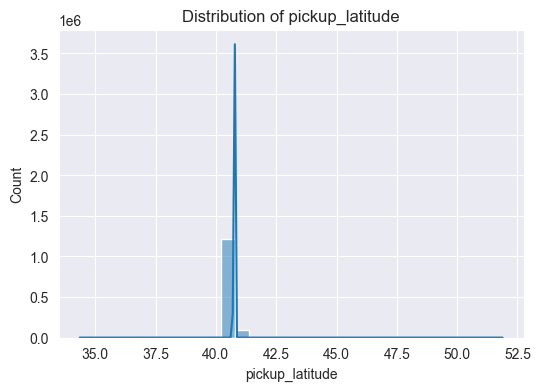

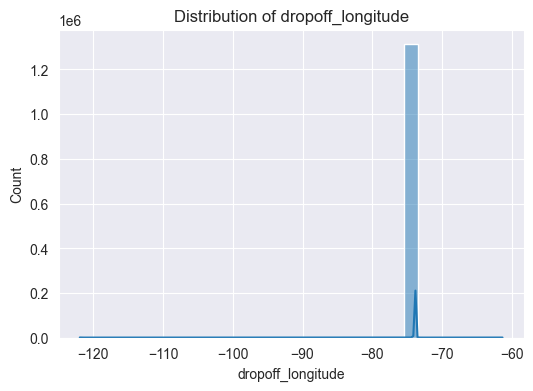

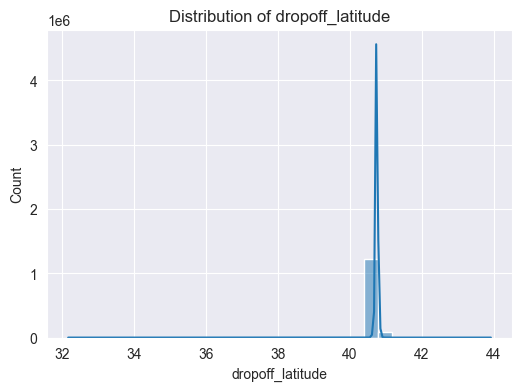

In [16]:
# Plotting the distribution of the  data features
features = X_train.select_dtypes(include=['float64', 'int64']).columns

for column in features:
    plt.figure(figsize=(6,4))
    sns.histplot(X_train[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    # plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = np.load("nyc_taxi_data.npy", allow_pickle=True).item()
X_train, y_train, X_test, y_test = dataset["X_train"], dataset["y_train"], dataset["X_test"], dataset["y_test"]

# Convert to Pandas DataFrames
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train, columns=["target"])  # Since y_train is a 1D array
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test, columns=["target"])  # Since y_test is a 1D array

